## Import Data

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score,recall_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # XGBoost is already imported
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import learning_curve # Uncommented learning_curve import
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## Memuat Data Set

In [174]:
df=pd.read_csv('data_anak_stunting_temanggung.csv')
print("=== 5 baris data set pertama ===")
print(df.head())

=== 5 baris data set pertama ===
   id jenis_data id_anak jenis_kelamin tanggal_lahir tanggal_pengukuran  \
0   1       Anak   A0001     Perempuan     5/29/2025          10/1/2025   
1   2       Anak   A0002     Laki-laki     6/17/2024          10/1/2025   
2   3       Anak   A0003     Perempuan     9/12/2023          10/1/2025   
3   4       Anak   A0004     Laki-laki    10/17/2024          10/1/2025   
4   5       Anak   A0005     Laki-laki     4/29/2023          10/1/2025   

   usia_bulan  tinggi_badan_cm  skor_z_haz  status_stunting kecamatan  \
0         4.1             52.1       -2.32  Stunting Ringan  Gemawang   
1        15.5             79.5       -2.56  Stunting Ringan  Gemawang   
2        24.6            105.9       -0.73           Normal  Gemawang   
3        11.5             73.3        0.91           Normal  Gemawang   
4        29.1            113.2       -0.77           Normal  Gemawang   

        desa  
0  Tlogorejo  
1  Ngadisepi  
2     Losari  
3  Ngadisepi  
4 

## Exploratory data analyst (EDA)

In [175]:
print("==== Info dataset =====")
print(df.info())


==== Info dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2200 non-null   int64  
 1   jenis_data          2200 non-null   object 
 2   id_anak             2200 non-null   object 
 3   jenis_kelamin       2200 non-null   object 
 4   tanggal_lahir       2200 non-null   object 
 5   tanggal_pengukuran  2200 non-null   object 
 6   usia_bulan          2200 non-null   float64
 7   tinggi_badan_cm     2200 non-null   float64
 8   skor_z_haz          2200 non-null   float64
 9   status_stunting     2200 non-null   object 
 10  kecamatan           2200 non-null   object 
 11  desa                2200 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 206.4+ KB
None


In [176]:
print("==== Duplikasi dataset =====")
print(df.duplicated().sum())

==== Duplikasi dataset =====
0


In [177]:
print("==== Deskripsi dataset =====")
print(df.describe())

==== Deskripsi dataset =====
                id   usia_bulan  tinggi_badan_cm   skor_z_haz
count  2200.000000  2200.000000      2200.000000  2200.000000
mean   1100.500000    29.701591        92.640091    -0.980214
std     635.229617    17.403160        16.958889     1.268323
min       1.000000     0.000000        45.300000    -4.970000
25%     550.750000    15.000000        81.800000    -1.850000
50%    1100.500000    30.000000        93.100000    -0.960000
75%    1650.250000    45.000000       103.700000    -0.120000
max    2200.000000    60.000000       155.900000     3.130000


In [178]:
print("==== jumlah missing value ====")
print(df.isnull().sum())

==== jumlah missing value ====
id                    0
jenis_data            0
id_anak               0
jenis_kelamin         0
tanggal_lahir         0
tanggal_pengukuran    0
usia_bulan            0
tinggi_badan_cm       0
skor_z_haz            0
status_stunting       0
kecamatan             0
desa                  0
dtype: int64


==== Cek Outlier Pada Data ====


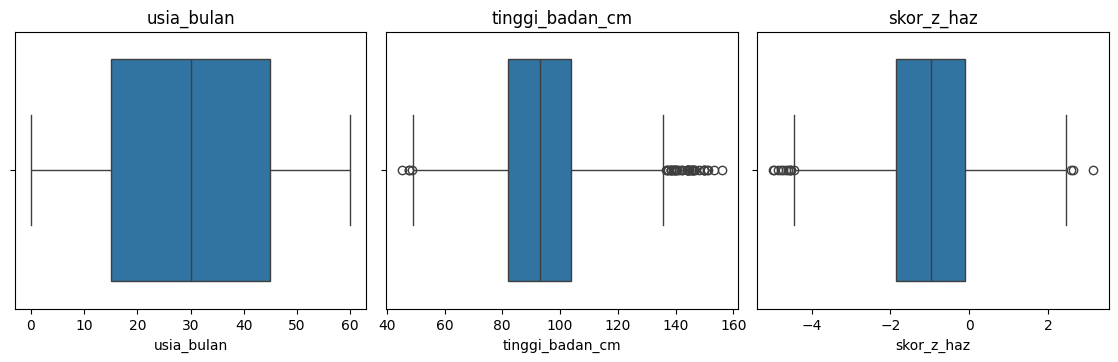

In [179]:
print("==== Cek Outlier Pada Data ====")
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# Remove the 'id' column as it's not a feature for outlier analysis
if 'id' in numeric_columns:
    numeric_columns.remove('id')

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

==== visualisasi data


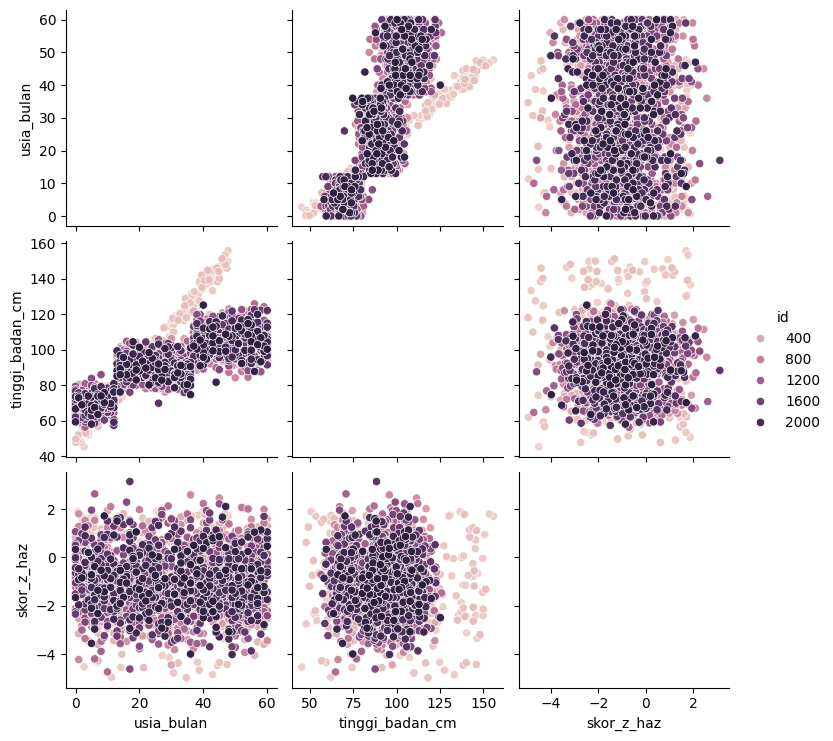

In [180]:
print("==== visualisasi data")
sns.pairplot(df, hue='id' )
plt.show()

==== visualisasi data


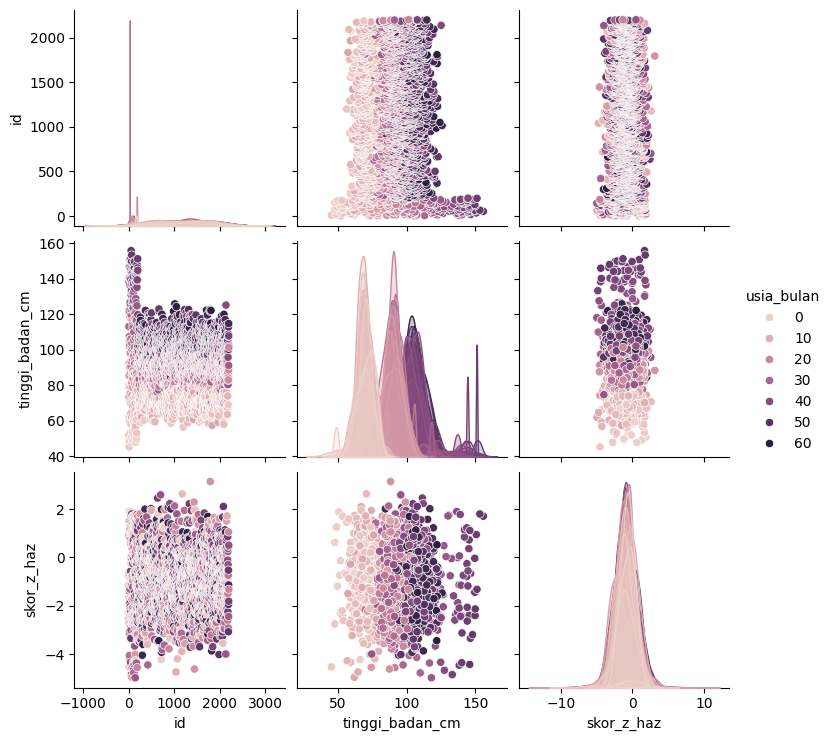

In [181]:
print("==== visualisasi data")
sns.pairplot(df, hue='usia_bulan' )
plt.show()

==== visualisasi data


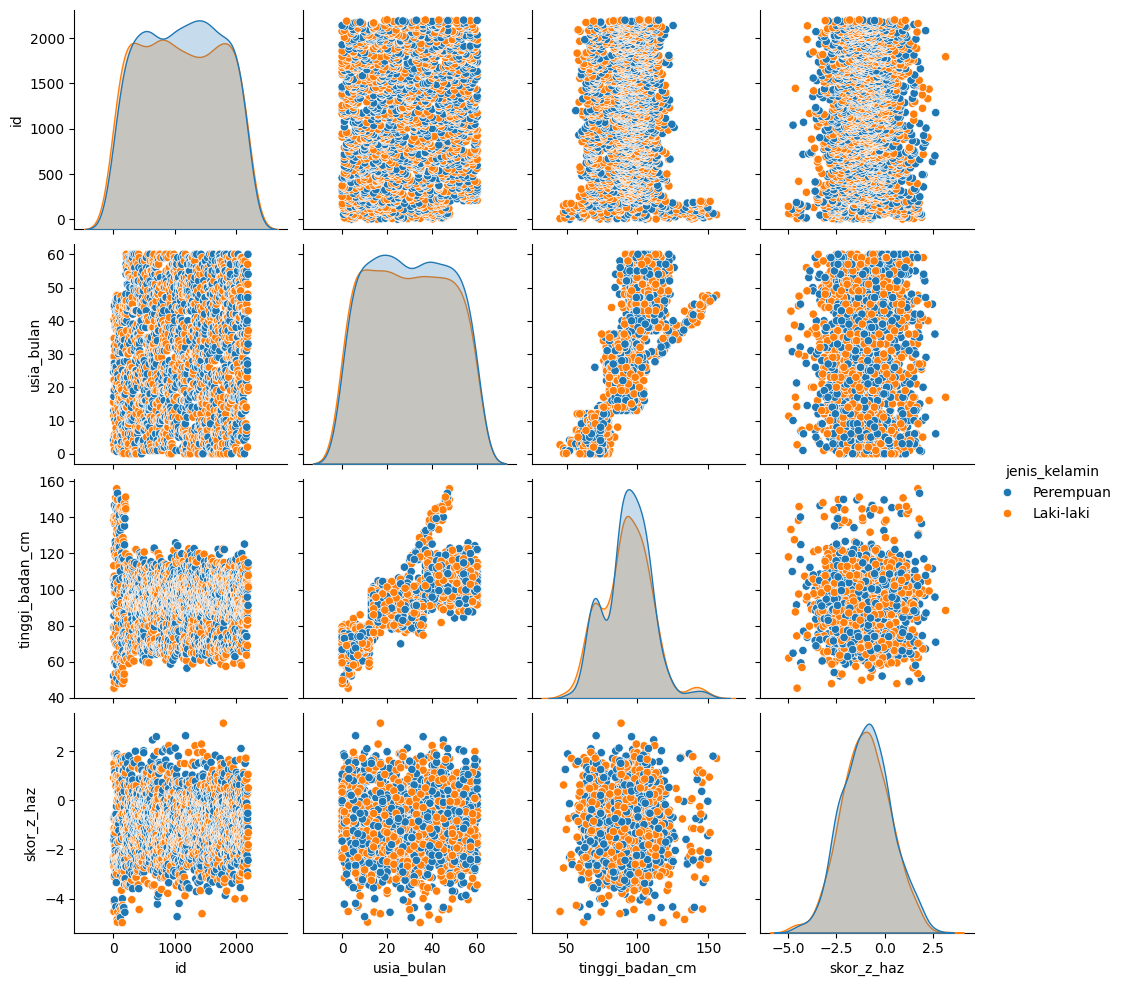

In [182]:
print("==== visualisasi data")
sns.pairplot(df, hue='jenis_kelamin' )
plt.show()

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2200 non-null   int64  
 1   jenis_data          2200 non-null   object 
 2   id_anak             2200 non-null   object 
 3   jenis_kelamin       2200 non-null   object 
 4   tanggal_lahir       2200 non-null   object 
 5   tanggal_pengukuran  2200 non-null   object 
 6   usia_bulan          2200 non-null   float64
 7   tinggi_badan_cm     2200 non-null   float64
 8   skor_z_haz          2200 non-null   float64
 9   status_stunting     2200 non-null   object 
 10  kecamatan           2200 non-null   object 
 11  desa                2200 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 206.4+ KB


In [184]:
print("==== korelasi dataset ====")
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
print(numeric_df.corr())

==== korelasi dataset ====
                       id  usia_bulan  tinggi_badan_cm  skor_z_haz
id               1.000000    0.064873        -0.062650    0.021785
usia_bulan       0.064873    1.000000         0.770738    0.002655
tinggi_badan_cm -0.062650    0.770738         1.000000   -0.016021
skor_z_haz       0.021785    0.002655        -0.016021    1.000000


=== Visualisasi Data ====


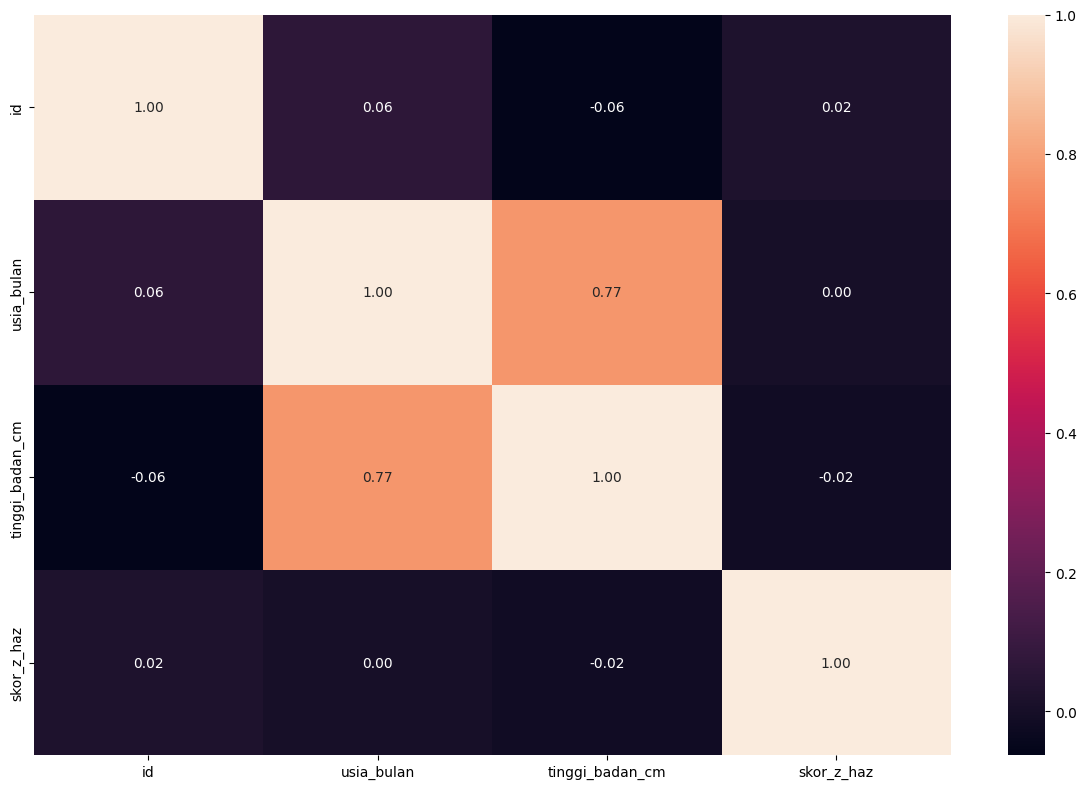

In [185]:
print("=== Visualisasi Data ====")
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.show()

==== visualisasi data ====


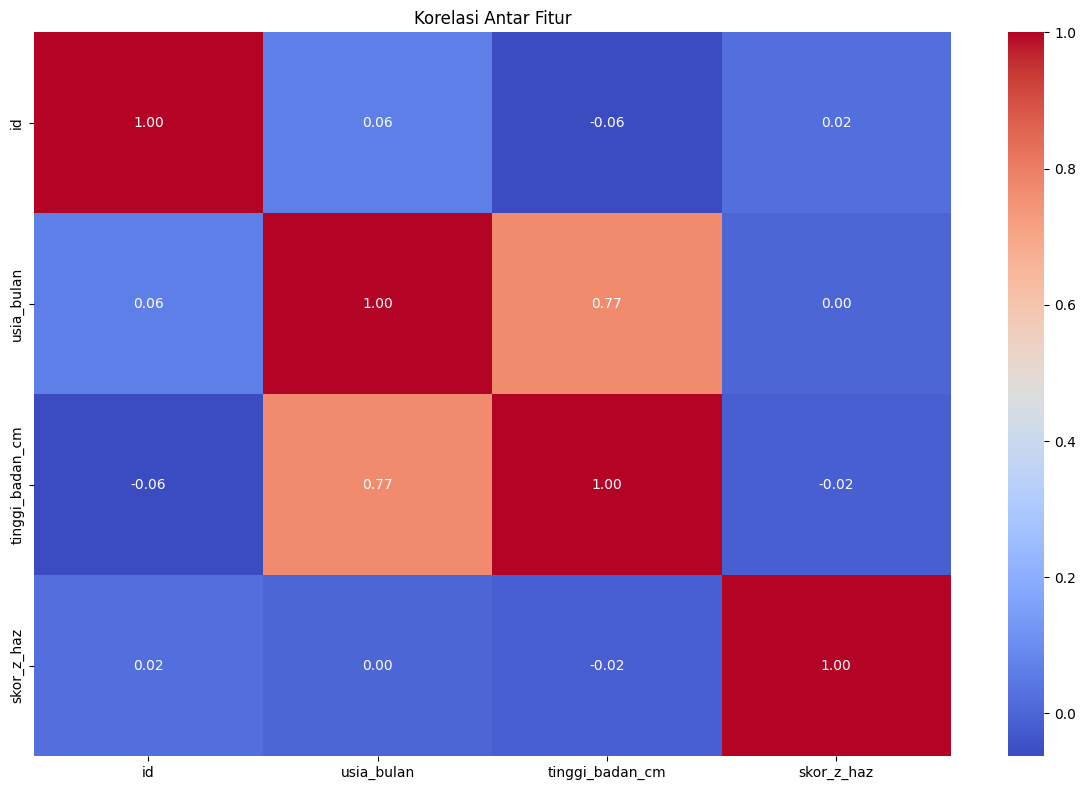

In [186]:
print("==== visualisasi data ====")
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Korelasi Antar Fitur')
plt.show()

### Data processing

In [187]:
print("=== menghapus data duplikat ===")
df.drop_duplicates(inplace=True)

=== menghapus data duplikat ===


In [188]:
print("=== menghapus missing  value ===")
df.dropna(inplace=True)

=== menghapus missing  value ===


In [189]:
# Fungsi untuk mendeteksi dan menangani outlier (clipping)
def handle_outliers_iqr(df, column):
    df_clean = df.copy()
    summary = {}
    for col in column:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # simpan ringkasan outlier
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)] [col]
        summary[col] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outliers count': len(outliers)
        }
        # tangani outlier dengan clipping ke batasa bawah dan atas
        df_clean[col] = df_clean[col].clip(lower_bound, upper_bound)

    return df_clean, pd.DataFrame(summary).T
# kolom numerik yang memiliki outlier
cols_with_outliers =["usia_bulan", "tinggi_badan_cm", "skor_z_haz"]

#terapkan fungsi
df_cleaned, outlier_summary = handle_outliers_iqr(df, cols_with_outliers)

outlier_summary

,Q1,Q3,IQR,lower_bound,upper_bound,outliers count
usia_bulan,15.00,45.00,30.00,-30.000,90.000,0.0
tinggi_badan_cm,81.80,103.70,21.90,48.950,136.550,46.0
skor_z_haz,-1.85,-0.12,1.73,-4.445,2.475,14.0


In [190]:
df_binned = df.copy()

#1 Binning kolom "usia_bulan" → kategori umur
age_bins = [0, 12, 24, 36, 48, 60, 72] # Adjusted bins for age in months
age_labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'] # Adjusted labels
df_binned['usia_bulan_bin'] = pd.cut(df['usia_bulan'], bins=age_bins, labels=age_labels, right=False)
h
#2 Binning kolom "tinggi_badan_cm" → rentang nilai tinggi badan
tb_bins = [0, 70, 85, 100, df['tinggi_badan_cm'].max() + 1] # Example bins for height
tb_labels = ['Pendek', 'Normal', 'Tinggi', 'Sangat Tinggi'] # Example labels
df_binned['tinggi_badan_cm_bin'] = pd.cut(df['tinggi_badan_cm'], bins=tb_bins, labels=tb_labels, right=False)

#3 Binning kolom "skor_z_haz" → kategori skor Z-score
zscore_bins = [-np.inf, -3, -2, 0, np.inf] # Example bins for Z-score (using -inf and inf for open-ended bins)
zscore_labels = ['Severely Stunted', 'Stunted', 'Normal', 'Tall'] # Example labels based on Z-score interpretation
df_binned['skor_z_haz_bin'] = pd.cut(df['skor_z_haz'], bins=zscore_bins, labels=zscore_labels, right=False)


#Menampilkan contoh hasil binning
df_binned[['usia_bulan', 'usia_bulan_bin', 'tinggi_badan_cm', 'tinggi_badan_cm_bin', 'skor_z_haz', 'skor_z_haz_bin']].head(10)

,usia_bulan,usia_bulan_bin,tinggi_badan_cm,tinggi_badan_cm_bin,skor_z_haz,skor_z_haz_bin
0,4.1,0-12,52.1,Pendek,-2.32,Stunted
1,15.5,13-24,79.5,Normal,-2.56,Stunted
2,24.6,25-36,105.9,Sangat Tinggi,-0.73,Normal
3,11.5,0-12,73.3,Normal,0.91,Tall
4,29.1,25-36,113.2,Sangat Tinggi,-0.77,Normal
5,40.2,37-48,138.3,Sangat Tinggi,-1.14,Normal
6,13.0,13-24,78.9,Normal,-1.63,Normal
7,17.2,13-24,85.6,Tinggi,-2.49,Stunted
8,2.7,0-12,45.3,Pendek,-4.52,Severely Stunted
9,5.5,0-12,61.7,Pendek,1.49,Tall


usia_bulan_bin
13-24    450
37-48    437
0-12     434
25-36    431
49-60    411
61-72     37
Name: count, dtype: int64
skor_z_haz_bin
Normal              1247
Tall                 480
Stunted              360
Severely Stunted     113
Name: count, dtype: int64


<Axes: xlabel='skor_z_haz_bin', ylabel='count'>

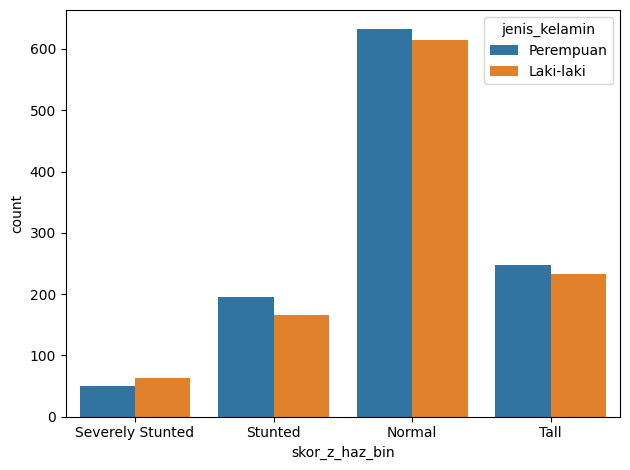

In [191]:
print(df_binned['usia_bulan_bin'].value_counts())
print(df_binned['skor_z_haz_bin'].value_counts())
sns.countplot(data=df_binned, x='skor_z_haz_bin', hue='jenis_kelamin')

In [192]:
print("=== normalisasi data === ")
numeric_features = ['usia_bulan', 'tinggi_badan_cm', 'skor_z_haz'] # Use correct numeric column names

print("\n=== data frame sebelum di normalisasi ===")
print(df[numeric_features].head())

df[numeric_features] = df[numeric_features].apply(pd.to_numeric, errors='coerce')

# Use MinMaxScaler for normalization
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("\n=== data frame setelah di normalisasi ===")
print(df[numeric_features].head())

=== normalisasi data === 

=== data frame sebelum di normalisasi ===
   usia_bulan  tinggi_badan_cm  skor_z_haz
0         4.1             52.1       -2.32
1        15.5             79.5       -2.56
2        24.6            105.9       -0.73
3        11.5             73.3        0.91
4        29.1            113.2       -0.77

=== data frame setelah di normalisasi ===
   usia_bulan  tinggi_badan_cm  skor_z_haz
0    0.068333         0.061483    0.327160
1    0.258333         0.309222    0.297531
2    0.410000         0.547920    0.523457
3    0.191667         0.253165    0.725926
4    0.485000         0.613924    0.518519


## Splitting Data

In [193]:
#split
print("==== membagi data menjadi training dan testing ===")

#pisahkan fitur (x) dan target (y)
x = df.drop(['status_stunting', 'skor_z_haz'], axis=1)
y = df['status_stunting']

#bagi data menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print(f"jumlah data training (x_train): {x_train.shape[0]} ")
print(f"jumlah data testing (x_test): {x_test.shape[0]} ")
print(f"jumlah target training (y_train): {y_train.shape[0]} ")
print(f"jumlah target testing (y_test): {y_test.shape[0]}")

==== membagi data menjadi training dan testing ===
jumlah data training (x_train): 1760 
jumlah data testing (x_test): 440 
jumlah target training (y_train): 1760 
jumlah target testing (y_test): 440


In [194]:
# Define numeric and categorical features, excluding the target variable
numeric_features = x_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = x_train.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor_clf = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
print("preprocessor 'preprocessor_clf' telah dibuat.")

preprocessor 'preprocessor_clf' telah dibuat.


## Xg Boost

=== evaluasi XGBoostClassifier ===
Akurasi: 78.18%
F1 Score: 68.9%
Confusion Matrix:
[[344   0   1]
 [ 22   0   1]
 [ 72   0   0]]


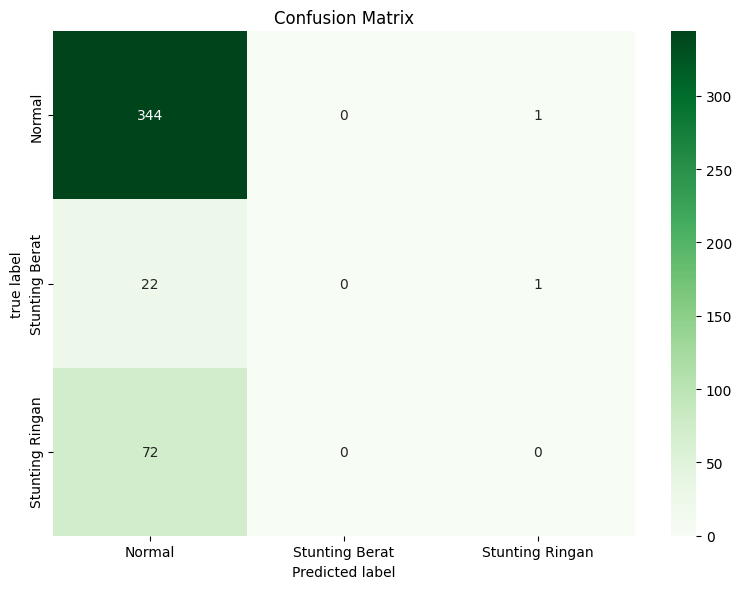

=== classification report ===
                 precision    recall  f1-score   support

         Normal       0.79      1.00      0.88       345
 Stunting Berat       0.00      0.00      0.00        23
Stunting Ringan       0.00      0.00      0.00        72

       accuracy                           0.78       440
      macro avg       0.26      0.33      0.29       440
   weighted avg       0.62      0.78      0.69       440

Akurasi rata-rata cross-validation: 77.61 %

=== Perbandingan Akurasi ===
Akurasi Training : 79.6%
Akurasi Testing  : 78.18%
Selisih          : 1.42%
Index(['id', 'jenis_data', 'id_anak', 'jenis_kelamin', 'tanggal_lahir',
       'tanggal_pengukuran', 'usia_bulan', 'tinggi_badan_cm', 'kecamatan',
       'desa'],
      dtype='object')


In [195]:
# membuat pipeline untuk xgbost
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_clf),
    ('classifier', XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        n_jobs=-1
    ))
])

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#melatih model
xgb_pipeline.fit(x_train, y_train_encoded)

#melakukan prediksi
y_pred_xgb_encoded = xgb_pipeline.predict(x_test)

# Decode predictions back to original labels for evaluation and reporting
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)


# evaluasi model
accuracy_xgb = round(accuracy_score(y_test_encoded, y_pred_xgb_encoded) * 100, 2)
f1_xgb = round(f1_score(y_test_encoded, y_pred_xgb_encoded, average='weighted') * 100, 2)
cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb_encoded)

#menampilkan hasil evaluasi
print("=== evaluasi XGBoostClassifier ===")
print(f"Akurasi: {accuracy_xgb}%")
print(f"F1 Score: {f1_xgb}%")
print("Confusion Matrix:")
print(cm_xgb)


# visuaisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('true label')
plt.show()

#menampilkan classsification report
print("=== classification report ===")
print(classification_report(y_test_encoded, y_pred_xgb_encoded, target_names=label_encoder.classes_))

#validasi silang
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_pipeline, x_train, y_train_encoded, cv=5, scoring='accuracy')
print("Akurasi rata-rata cross-validation:", round(scores.mean() * 100, 2), "%")

# Mengecek overfitting dengan membandingkan akurasi train vs test
train_pred_xgb = xgb_pipeline.predict(x_train)
train_acc_xgb = round(accuracy_score(y_train_encoded, train_pred_xgb) * 100, 2)

print("\n=== Perbandingan Akurasi ===")
print(f"Akurasi Training : {train_acc_xgb}%")
print(f"Akurasi Testing  : {accuracy_xgb}%")
print(f"Selisih          : {round(train_acc_xgb - accuracy_xgb, 2)}%")

print(x_train.columns)




## Random Forest

=== Evaluasi RandomForestClassifier (Optimized) ===
Accuracy: 72.73 %
F1 Score (weighted): 69.65 %
Confusion Matrix:
[[309  20  16]
 [ 16   7   0]
 [ 52  16   4]]


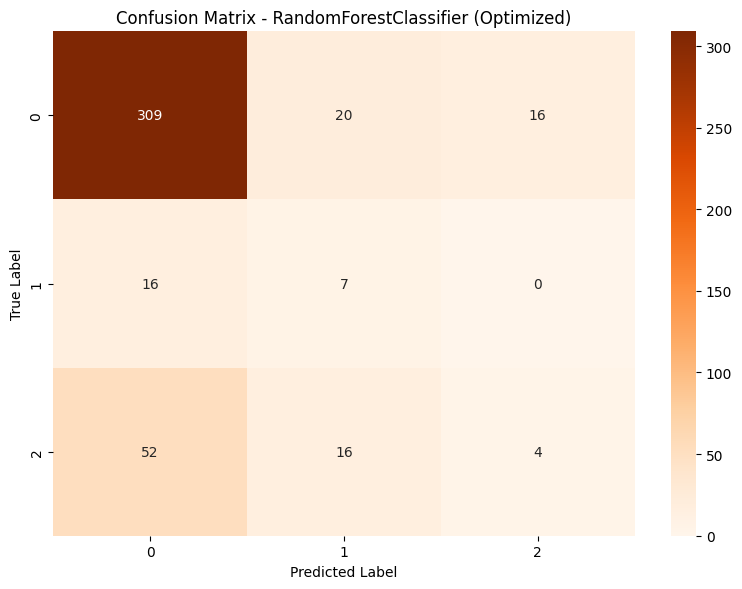


Classification Report:
                 precision    recall  f1-score   support

         Normal       0.82      0.90      0.86       345
 Stunting Berat       0.16      0.30      0.21        23
Stunting Ringan       0.20      0.06      0.09        72

       accuracy                           0.73       440
      macro avg       0.39      0.42      0.39       440
   weighted avg       0.68      0.73      0.70       440



In [196]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_clf),
    ('classifier', RandomForestClassifier(
        n_estimators=500,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        bootstrap=True,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

# === Training Model ===
rf_pipeline.fit(x_train, y_train)

# === Prediksi Data Uji ===
y_pred_rf = rf_pipeline.predict(x_test)

# === Evaluasi Model ===
accuracy_rf = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
f1_rf = round(f1_score(y_test, y_pred_rf, average='weighted') * 100, 2)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("=== Evaluasi RandomForestClassifier (Optimized) ===")
print(f"Accuracy: {accuracy_rf} %")
print(f"F1 Score (weighted): {f1_rf} %")
print("Confusion Matrix:")
print(cm_rf)

# === Visualisasi Confusion Matrix ===
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - RandomForestClassifier (Optimized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# === Classification Report ===
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))



=== Perbandingan Akurasi ===
XGBoost Accuracy : 78.18%
Random Forest Accuracy : 72.73%
Selisih : 5.45%


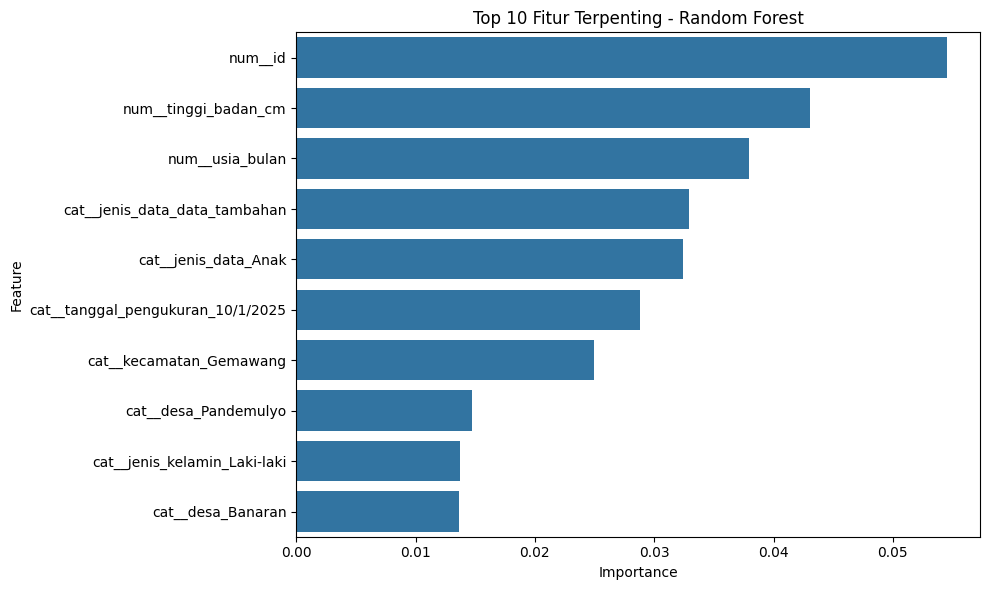

In [197]:
print("=== Perbandingan Akurasi ===")
print(f"XGBoost Accuracy : {accuracy_xgb}%")
print(f"Random Forest Accuracy : {accuracy_rf}%")
print(f"Selisih : {round(abs(accuracy_xgb - accuracy_rf), 2)}%")


importances = rf_pipeline.named_steps['classifier'].feature_importances_
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Fitur Terpenting - Random Forest')
plt.show()


## Tunning

Best params (GridSearch): {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}

=== RandomForest (GridSearch) ===
Accuracy: 0.7818181818181819
                 precision    recall  f1-score   support

         Normal       0.78      1.00      0.88       345
 Stunting Berat       0.00      0.00      0.00        23
Stunting Ringan       0.00      0.00      0.00        72

       accuracy                           0.78       440
      macro avg       0.26      0.33      0.29       440
   weighted avg       0.61      0.78      0.69       440

Confusion matrix:
 [[344   0   1]
 [ 23   0   0]
 [ 72   0   0]]


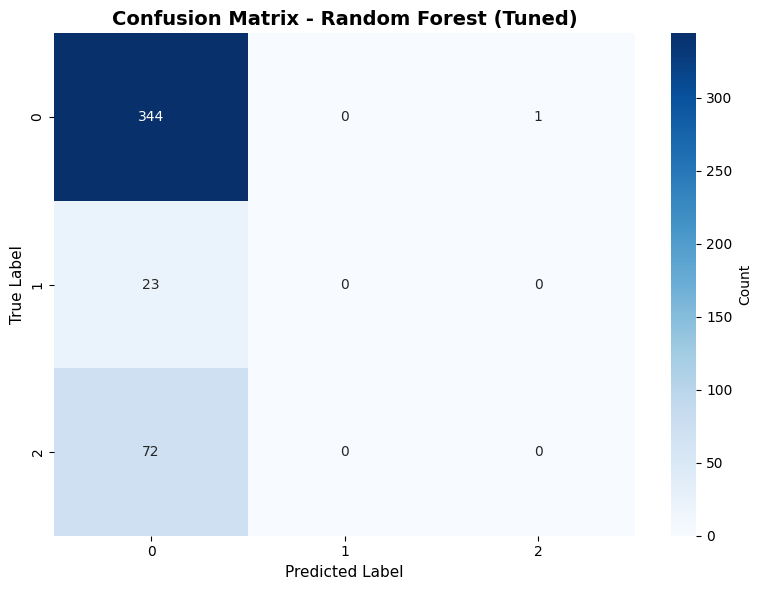


CLASSIFICATION REPORT
                 precision    recall  f1-score   support

         Normal       0.78      1.00      0.88       345
 Stunting Berat       0.00      0.00      0.00        23
Stunting Ringan       0.00      0.00      0.00        72

       accuracy                           0.78       440
      macro avg       0.26      0.33      0.29       440
   weighted avg       0.61      0.78      0.69       440



In [198]:
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2']
}
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)
pipe_gs = Pipeline([('pre', preprocessor_clf), ('model', rf_base)])
gs = GridSearchCV(pipe_gs, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gs.fit(x_train, y_train)
best = gs.best_estimator_
print("Best params (GridSearch):", gs.best_params_)
preds_gs = best.predict(x_test)
acc_gs = accuracy_score(y_test, preds_gs)
print("\n=== RandomForest (GridSearch) ===")
print("Accuracy:", acc_gs)
print(classification_report(y_test, preds_gs))
print("Confusion matrix:\n", confusion_matrix(y_test, preds_gs))

gs = GridSearchCV(pipe_gs, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)


#l Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Count'})
plt.title("Confusion Matrix - Random Forest (Tuned)", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=11)
plt.ylabel("True Label", fontsize=11)
plt.tight_layout()
plt.show()

# ===== CLASSIFICATION REPORT =====

print("\n" + "=" * 80)
print("CLASSIFICATION REPORT")
print("=" * 80)
print(classification_report(y_test, preds_gs))


##Perbandingan

PERBANDINGAN METRIK PERFORMA MODEL
           XGBoost  Random Forest (Optimized)  Random Forest (Grid Search)
Accuracy     78.18                      72.73                        78.18
F1 Score     68.90                      69.65                        68.81
Precision    61.58                      68.39                        61.44
Recall       78.18                      72.73                        78.18

PERBANDINGAN METRIK PERFORMA MODEL
           XGBoost  Random Forest (Optimized)  Random Forest (Grid Search)
Accuracy     78.18                      72.73                        78.18
F1 Score     68.90                      69.65                        68.81
Precision    61.58                      68.39                        61.44
Recall       78.18                      72.73                        78.18

Classification report (XGBoost):
                  precision    recall  f1-score   support

         Normal       0.79      1.00      0.88       345
 Stunting Berat       0.00   

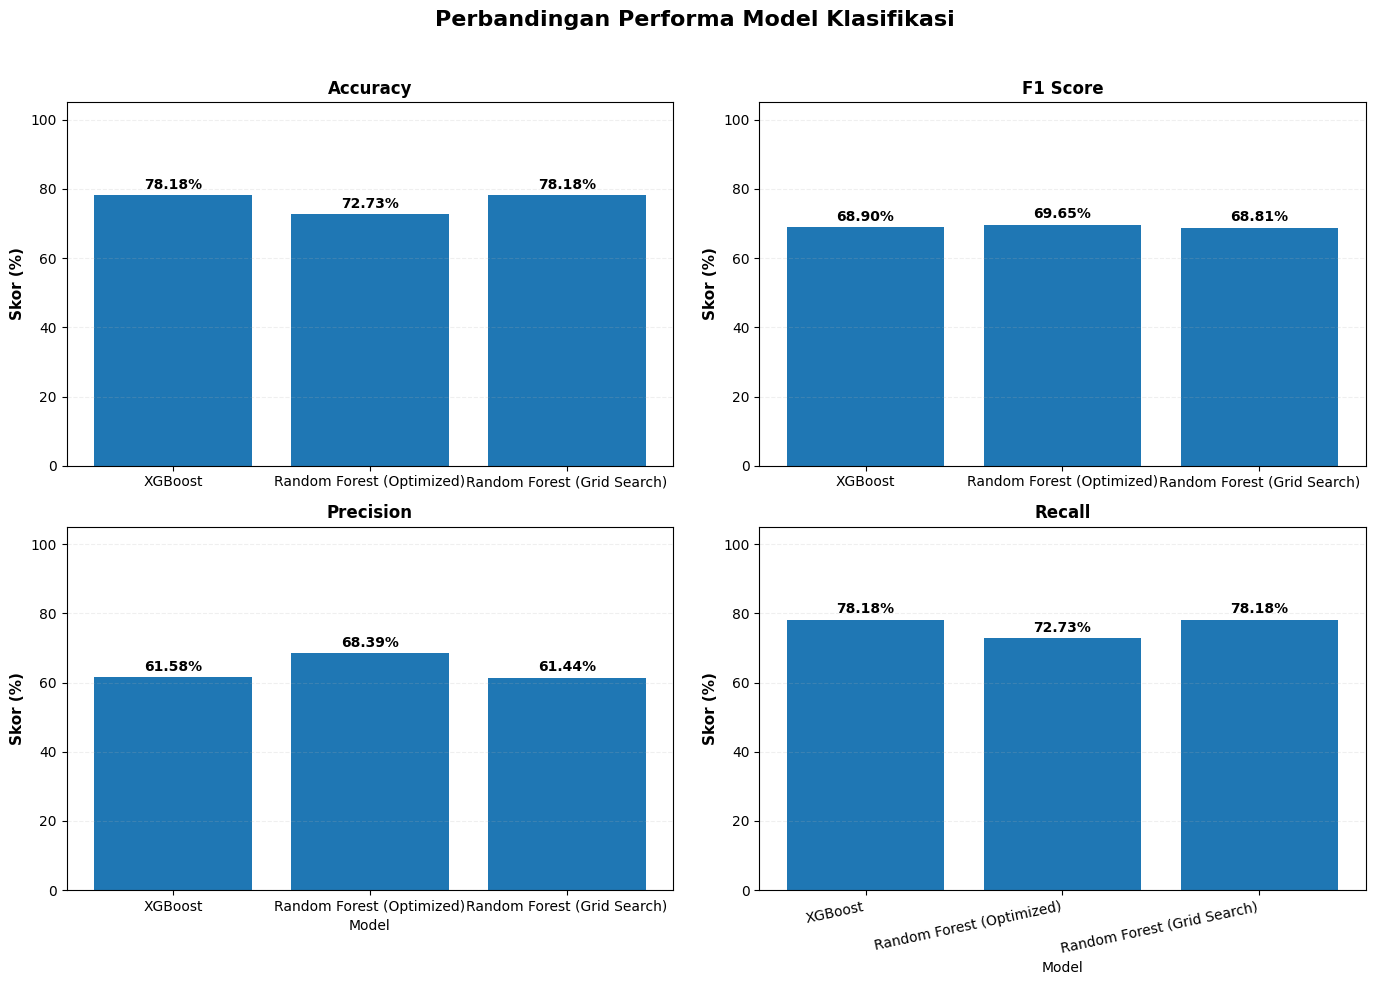

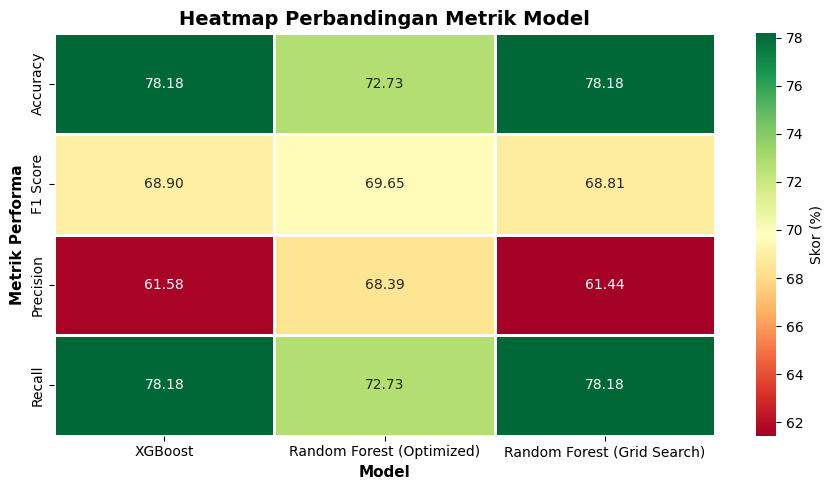


REKOMENDASI
Model Terbaik Secara Keseluruhan (sum of metrics): XGBoost
Total Skor (Sum of All Metrics): 286.84%

Analisis singkat:
- Accuracy terbaik: XGBoost (78.18%)
- F1 Score terbaik: Random Forest (Optimized) (69.65%)
- Precision terbaik: Random Forest (Optimized) (68.39%)
- Recall terbaik: XGBoost (78.18%)


In [199]:

def metrics_dict(y_true, y_pred):
    return {
        'Accuracy': round(accuracy_score(y_true, y_pred) * 100, 2),
        'F1 Score': round(f1_score(y_true, y_pred, average='weighted') * 100, 2),
        'Precision': round(precision_score(y_true, y_pred, average='weighted', zero_division=0) * 100, 2),
        'Recall': round(recall_score(y_true, y_pred, average='weighted') * 100, 2)
    }

xgb_metrics = metrics_dict(y_test_encoded, y_pred_xgb_encoded)
rf_optimized_metrics = metrics_dict(y_test, y_pred_rf)
rf_grid_metrics = metrics_dict(y_test, preds_gs)

comparison_df = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'Random Forest (Optimized)': rf_optimized_metrics,
    'Random Forest (Grid Search)': rf_grid_metrics
})

print("="*80)
print("PERBANDINGAN METRIK PERFORMA MODEL")
print("="*80)
print(comparison_df)


# PRINT & SAVE SUMMARY

print("\n" + "="*80)
print("PERBANDINGAN METRIK PERFORMA MODEL")
print("="*80)
print(comparison_df)
print("\nClassification report (XGBoost):\n", classification_report(y_test, y_pred_xgb, zero_division=0))
print("Confusion matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))

print("\nClassification report (RF optimized):\n", classification_report(y_test, y_pred_rf, zero_division=0))
print("Confusion matrix (RF optimized):\n", confusion_matrix(y_test, y_pred_rf))

print("\nClassification report (RF grid):\n", classification_report(y_test, preds_gs, zero_division=0))
print("Confusion matrix (RF grid):\n", confusion_matrix(y_test, preds_gs))

comparison_df.to_csv('comparison_metrics_models.csv')
print("Saved comparison_metrics_models.csv")

# PARAMETER SUMMARY TABLE

print("\n" + "="*80)
print("PERBANDINGAN PARAMETER MODEL")
print("="*80)


# IDENTIFIKASI MODEL TERBAIK PER METRIK

best_model = comparison_df.idxmax(axis=1)
print("\n" + "="*80)
print("MODEL TERBAIK UNTUK SETIAP METRIK")
print("="*80)
for metric, model in best_model.items():
    best_score = comparison_df.loc[metric, model]
    print(f"{metric}: {model} ({best_score}%)")

# overall "sum of metrics" ranking
total_scores = comparison_df.sum(axis=0)
best_overall = total_scores.idxmax()
best_score_sum = total_scores.max()
print("\nOverall (sum of metrics):", best_overall, f"({best_score_sum:.2f} total percent points)")

# VISUALISASI: Bar charts dan heatmap

plt.rcParams.update({'figure.autolayout': True})
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Perbandingan Performa Model Klasifikasi', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
# use default matplotlib colors (no forced hex)
for ax, metric in zip(axes.flat, metrics):
    values = comparison_df.loc[metric]
    bars = ax.bar(comparison_df.columns, values)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1.0, f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')
    ax.set_ylabel('Skor (%)', fontsize=11, fontweight='bold')
    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.set_ylim(0, 105)
    ax.grid(axis='y', alpha=0.2, linestyle='--')

plt.setp(axes[-1, :], xlabel='Model')
plt.xticks(rotation=12, ha='right')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(comparison_df, annot=True, fmt='.2f', cmap='RdYlGn', cbar_kws={'label': 'Skor (%)'}, linewidths=0.8)
plt.title('Heatmap Perbandingan Metrik Model', fontsize=14, fontweight='bold')
plt.ylabel('Metrik Performa', fontsize=11, fontweight='bold')
plt.xlabel('Model', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("REKOMENDASI")
print("="*80)
print(f"Model Terbaik Secara Keseluruhan (sum of metrics): {best_overall}")
print(f"Total Skor (Sum of All Metrics): {best_score_sum:.2f}%")
print("\nAnalisis singkat:")
for metric in metrics:
    print(f"- {metric} terbaik: {best_model[metric]} ({comparison_df.loc[metric, best_model[metric]]}%)")
print("="*80)

In [200]:
# Function to calculate and print overfitting analysis
def analyze_overfitting(model_name, model, X_train, y_train, X_test, y_test):
    # Calculate training and testing accuracy
    train_accuracy = model.score(X_train, y_train) * 100
    test_accuracy = model.score(X_test, y_test) * 100
    accuracy_difference = train_accuracy - test_accuracy

    print(f"\n=== Overfitting Analysis for {model_name} ===")
    print(f"  Training Accuracy: {train_accuracy:.2f}%")
    print(f"  Testing Accuracy: {test_accuracy:.2f}%")
    print(f"  Difference (Train - Test): {accuracy_difference:.2f}%")

    if accuracy_difference > 5:  # Threshold for potential overfitting
        print("  Indication: Potential Overfitting")
    else:
        print("  Indication: No significant overfitting")

# Analyze overfitting for each model
analyze_overfitting("XGBoost", xgb_pipeline, x_train, y_train_encoded, x_test, y_test_encoded)
analyze_overfitting("Random Forest (Optimized)", rf_pipeline, x_train, y_train, x_test, y_test)
analyze_overfitting("Random Forest (Grid Search)", best, x_train, y_train, x_test, y_test)


=== Overfitting Analysis for XGBoost ===
  Training Accuracy: 79.60%
  Testing Accuracy: 78.18%
  Difference (Train - Test): 1.42%
  Indication: No significant overfitting

=== Overfitting Analysis for Random Forest (Optimized) ===
  Training Accuracy: 76.36%
  Testing Accuracy: 72.73%
  Difference (Train - Test): 3.64%
  Indication: No significant overfitting

=== Overfitting Analysis for Random Forest (Grid Search) ===
  Training Accuracy: 99.83%
  Testing Accuracy: 78.18%
  Difference (Train - Test): 21.65%
  Indication: Potential Overfitting
